# 50
ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [19]:
#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
import pandas as pd
file=pd.read_csv('newsCorpora.csv',sep='\t',header=None,names=['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP'])
file1=file[file['PUBLISHER'].isin(['Reuters','Huffington Post','Businessweek','Contactmusic.com','Daily Mail'])]


In [39]:
file1.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,248200,going nowhere fast at mcdonald s,http://www.huffingtonpost.com/jack-temple/mcdo...,Huffington Post,b,d2TIybtNd4aPZIMrVu3tVUSu870sM,www.huffingtonpost.com,1400986888691
1,407497,this phone plan lets you pay for facebook and ...,http://www.huffingtonpost.com/2014/07/31/sprin...,Huffington Post,t,dUYL87lG0rr5S5Mm-H_jM0AD5umdM,www.huffingtonpost.com,1406865857320
2,86454,game of thrones season four premiere sees hbo ...,http://www.dailymail.co.uk/news/article-259854...,Daily Mail,e,dWW7KObMwSCdowM_3PYsmBJm7rcsM,www.dailymail.co.uk,1396882098429
3,252280,the insta wedding how kim kardashian and kany...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dpFsJPHfHX9aF9M6iKphFeQmXqNzM,www.dailymail.co.uk,1401112152169
4,315101,abbvie presses case for 0 billion shire takeover,http://in.reuters.com/article/2014/06/25/shire...,Reuters,b,dXXj1Q29u_Hc7oM7foZCXdVbwPsJM,in.reuters.com,1403703345189


In [83]:
#3.抽出された事例をランダムに並び替える．
#4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
from sklearn.model_selection import train_test_split
#x_trainとx_validに分ける。random_stateで、stratifyのラベルを偏らないようにする 
#x_train, x_valid1  = train_test_split( file1, train_size=0.8,shuffle=True,random_state=123)
#x_valid,x_test =train_test_split(x_valid1,train_size=0.5,shuffle=True,random_state=123)
x_train, x_valid1  = train_test_split( file1, train_size=0.8,shuffle=True)
x_valid,x_test =train_test_split(x_valid1,train_size=0.5,shuffle=True)

In [84]:
from sklearn.model_selection import train_test_split
feature=file1#特徴データ
#x_trainは入力データ, 出力データ(目的変数)
x_train, x_valid1  = train_test_split( feature, test_size=0.2,shuffle=True)
x_valid,x_test =train_test_split(x_valid1,train_size=0.5,shuffle=True)

In [85]:
#学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．
print(x_train['CATEGORY'].value_counts())
print(x_valid['CATEGORY'].value_counts())
print(x_test['CATEGORY'].value_counts())

b    4489
e    4236
t    1210
m     737
Name: CATEGORY, dtype: int64
b    592
e    505
t    139
m     98
Name: CATEGORY, dtype: int64
b    546
e    538
t    175
m     75
Name: CATEGORY, dtype: int64


In [86]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
#4.ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ
x_train.to_csv("text.txt", sep="\t",index=False)
x_valid.to_csv("valid.txt", sep="\t", index=False)
x_test.to_csv("test..txt", sep="\t", index=False)
print(x_train)

           ID                                              TITLE  \
760    253019  us drugs giant pfizer walks away from £0m take...   
10369  239283  refile facebook narrows audience that sees new...   
13122   92168  update 0 comcast defends merger as us review k...   
6711   367851  fcc names heads of comcast twc  at t directv d...   
6790   173300  ecb primed for action seen boosting inflation ...   
...       ...                                                ...   
1460   393422  faa suggests southwest pay  0 million fine ove...   
2412    41547  home prices rose 0 0   smallest gain since aug...   
4168    87262  japan current account rebounds to first surplu...   
7433   367073  russian pilots who managed to pull up and avoi...   
1410   361519  jessica simpson   jessica simpson hosts  famil...   

                                                     URL         PUBLISHER  \
760    http://www.dailymail.co.uk/news/article-263969...        Daily Mail   
10369  http://www.reuters.c

# 51
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [87]:
import string
import re

def preprocessing(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(table)  # 記号をスペースに置換                    
    text = text.lower()  # 小文字化                                         
    text = re.sub('[0-9]+', '0', text)  # 数字列を0に置換                   

    return text

file1=pd.concat([x_train,x_valid,x_test],axis=0)
file1.reset_index(drop=True,inplace=True)

file1['TITLE']=file1['TITLE'].map(lambda x:preprocessing(x))


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
#初めからlen(x_train)+len(x_valid)まで
train_valid=file1[:len(x_train)+len(x_valid)]
test=file1[len(x_train)+len(x_valid):]

In [90]:
print(len(train_valid))
print(len(test))
print(len(file1))
print(len(x_train))
print(len(x_valid))

12006
1334
13340
10672
1334


In [91]:
train_valid=train_valid[['TITLE','CATEGORY']]
test=test[['TITLE','CATEGORY']]

In [92]:
#TfidfVectorizer: 文書群を与えると各文書をtf-idfの値を基にしたベクトルに変換する
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf =TfidfVectorizer(min_df=10,ngram_range=(1,2))

In [93]:
vec_tfidf

TfidfVectorizer(min_df=10, ngram_range=(1, 2))

In [94]:
#fit:入力の文書群を与えて語彙の獲得やidfの計算をする
#transform: fitしたことで得た語彙やidfを基に文書をtf-idf行列に変換する
train_valid_vec= vec_tfidf.fit_transform(train_valid['TITLE'])
test_vec= vec_tfidf.transform(test['TITLE'])

In [95]:
#ベクトルをデータフレームに変換
train_valid_feature=pd.DataFrame(train_valid_vec.toarray(),columns=vec_tfidf.get_feature_names())
#valid_feature=pd.DataFrame(valid_vec.toarray())
test_feature=pd.DataFrame(test_vec.toarray(),columns=vec_tfidf.get_feature_names())

In [96]:
train_feature= train_valid_feature[:len(x_train)]
valid_feature= train_valid_feature[len(x_train):]

# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
train_feature.to_csv("text.feature.txt", sep="\t",index=False)
valid_feature.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature.to_csv("test.feature.txt", sep="\t", index=False)

In [97]:
train_feature.head()

,0m,0nd,0s,0st,0th,0th birthday,aa,abbvie,abc,about,...,young,your,your mother,yr,yr high,yuan,zac,zac efron,zendaya,zone
0,0.297949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# うまく行かなかった方

In [102]:
train_f=x_train[['TITLE','CATEGORY']]
valid_f=x_valid[['TITLE','CATEGORY']]
test_f=x_test[['TITLE','CATEGORY']]

In [103]:
test_f

,TITLE,CATEGORY
6993,yen weakens versus most major peers kiwi appr...,b
7906,us debt falls for first time in 0 weeks on ukr...,b
9934,update 0 ford profit driven down by north amer...,b
12732,boeing to build largest 0 dreamliner in south ...,b
8001,us tv network fox to air live grease musical...,e
...,...,...
4500,level 0 agrees to buy tw telecom in 0 0 billi...,b
2512,robin thicke s new album is reportedly called ...,e
5600,kim kardashian wears pencil skirt and tank top...,e
9462,paul walker gets emotional mtv movie awards tr...,e


In [104]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf =TfidfVectorizer(min_df=10,ngram_range=(1,2))

In [105]:
train_vec= vec_tfidf.fit_transform(train_f['TITLE'])
valid_vec= vec_tfidf.fit_transform(valid_f['TITLE'])
test_vec= vec_tfidf.fit_transform(test_f['TITLE'])

In [106]:
print(train_vec)

  (0, 230)	0.31801413064933143
  (0, 180)	0.32893186774233096
  (0, 2281)	0.25211167895691217
  (0, 774)	0.13746379619790158
  (0, 229)	0.26657206050329907
  (0, 2095)	0.31255343182011514
  (0, 0)	0.3143003196338374
  (0, 816)	0.19274376182180666
  (0, 179)	0.30330518907239734
  (0, 1587)	0.28083229973254736
  (0, 861)	0.32423911776272596
  (0, 601)	0.32423911776272596
  (0, 2314)	0.1496871940621671
  (1, 1626)	0.39547815453899177
  (1, 755)	0.3004981499816169
  (1, 2325)	0.42384169662524923
  (1, 1448)	0.24843695819414208
  (1, 1875)	0.3599124335679201
  (1, 2129)	0.3118478888752606
  (1, 691)	0.3628283462524844
  (1, 1728)	0.3917967721511741
  (2, 141)	0.4179578636311192
  (2, 1489)	0.31123991557078523
  (2, 1768)	0.3661976037224127
  (2, 127)	0.19393920181596058
  :	:
  (10668, 1647)	0.3352702904770304
  (10668, 979)	0.32530911530134643
  (10668, 833)	0.3575877702147
  (10669, 16)	0.45785228895818497
  (10669, 1084)	0.35550200028120127
  (10669, 1027)	0.45279510485977154
  (10669, 1

In [108]:
#ベクトルをデータフレームに変換
train_feature=pd.DataFrame(train_vec.toarray(),columns=vec_tfidf.get_feature_names())
#valid_feature=pd.DataFrame(valid_vec.toarray())
#test_feature=pd.DataFrame(test_vec.toarray())

ValueError: Shape of passed values is (10672, 2483), indices imply (10672, 194)

In [190]:
print(train_feature)

       0     1     2     3     4     5     6     7     8     9     ...  2509  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
10667   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10668   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10669   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10670   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10671   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

           2510  2511  2512  2513  2514

In [156]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
train_feature.to_csv("text.feature.txt", sep="\t")
valid_feature.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature.to_csv("test.feature.txt", sep="\t", index=False)

In [123]:
#単語列のベクトル配列にする
from sklearn.feature_extraction.text import TfidfVectorizer
feature_train=[]
feature_valid=[]
feature_test=[]
for i in range(len(file_tr)):
    X=vectorizer.fit_transform([file_tr[i]]).toarray()
    feature_train.append(X)

feature_valid=[]
for i in range(len(file_va)):
    X=vectorizer.fit_transform([file_va[i]]).toarray()
    feature_valid.append(X)
    
feature_test=[]
for i in range(len(file_te)):
    X=vectorizer.fit_transform([file_te[i]]).toarray()
    feature_test.append(X)

AttributeError: idf_ not found

In [122]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
#feature_train.to_csv("text.feature.txt", sep="\t", index=False)
#feature_valid.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature=''.join(feature_test)

TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [101]:
train_feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_feature=vectorizer.fit(file_tr['TITLE'])
valid_feature=vectorizer.fit(file_va['TITLE'])
test_feature=vectorizer.fit(file_te['TITLE'])

In [86]:

file_tr['TITLE'][0]

"Valeant sees 'unrivaled' growth in possible Allergan merger"

In [82]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
train_feature.to_csv("text.feature.txt", sep="\t", index=False)
valid_feature.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature.to_csv("test.feature.txt", sep="\t", index=False)

AttributeError: 'TfidfVectorizer' object has no attribute 'to_csv'

In [10]:
target=file1[['TITLE','CATEGORY']]#ラベルデータ
#ベクトルにする
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train['TITLE'] = vectorizer.fit(x_train['TITLE'])
x_feature_train, x_feature_valid1  = train_test_split( , test_size=0.2,shuffle=True)

In [11]:
x_feature_valid, x_feature_test =train_test_split(x_feature_valid1,train_size=0.5,shuffle=True)

In [14]:
print(len(file1))
print(len(x_feature_train))
print(len(x_feature_valid))
print(len(x_feature_test))

13340
10672
1334
1334


In [13]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
x_train.to_csv("text.feature.txt", sep="\t", index=False)
x_valid.to_csv("valid.feature.txt", sep="\t", index=False)
x_test.to_csv("test.feature.txt", sep="\t", index=False)

# 52
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [42]:
#カテゴリをfloatに直さないと could not convert string to float: 'b'

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
#lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#上のエラーが出る場合はmax_iterのデフォルト100回で収束しなかったということなので回数を増やしたら良い

In [69]:
lr.fit(train_feature,x_train['CATEGORY'])

LogisticRegression(max_iter=200)

# 53
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [70]:
lr.predict(train_feature)

array(['e', 'b', 'b', ..., 'b', 'b', 'e'], dtype=object)

In [71]:
#predict:メソッドに説明変数を与えてターゲットを予測。proba:クラスの分類確率
train_predict=[lr.predict(train_feature),lr.predict_proba(train_feature)]
valid_predict=[lr.predict(valid_feature),lr.predict_proba(valid_feature)]
test_predict=[lr.predict(test_feature),lr.predict_proba(test_feature)]

In [82]:
train_predict[1]

array([[0.04375705, 0.92191956, 0.01531756, 0.01900583],
       [0.98735008, 0.00454536, 0.00214642, 0.00595814],
       [0.95999404, 0.02015797, 0.00885025, 0.01099774],
       ...,
       [0.8410876 , 0.04744135, 0.00993659, 0.10153447],
       [0.66529675, 0.20602532, 0.02917744, 0.0995005 ],
       [0.10950911, 0.67528094, 0.06476502, 0.15044493]])

In [77]:
pd.DataFrame(train_predict[1],train_predict[0])

,0,1,2,3
e,0.043757,0.921920,0.015318,0.019006
b,0.987350,0.004545,0.002146,0.005958
b,0.959994,0.020158,0.008850,0.010998
b,0.491144,0.089783,0.308137,0.110936
b,0.953192,0.024674,0.010329,0.011805
...,...,...,...,...
t,0.413489,0.109855,0.053448,0.423209
t,0.112991,0.172883,0.031938,0.682187
b,0.841088,0.047441,0.009937,0.101534
b,0.665297,0.206025,0.029177,0.099500


In [193]:
print(train_predict)
print('-------------------')
print(valid_predict)
print('-------------------')
print(test_predict)

[array(['e', 'b', 'e', ..., 'e', 'e', 'e'], dtype=object), array([[0.06183362, 0.88797719, 0.01725711, 0.03293208],
       [0.86440124, 0.07130452, 0.0310094 , 0.03328484],
       [0.092747  , 0.79376176, 0.05370337, 0.05978787],
       ...,
       [0.06581071, 0.88130995, 0.01786384, 0.0350155 ],
       [0.07652913, 0.8831307 , 0.0231099 , 0.01723027],
       [0.00855126, 0.96597591, 0.01966053, 0.0058123 ]])]
-------------------
[array(['e', 'e', 'b', ..., 'e', 'b', 'e'], dtype=object), array([[0.2196549 , 0.68007544, 0.04089976, 0.0593699 ],
       [0.15319779, 0.77221647, 0.02524967, 0.04933607],
       [0.49814933, 0.39141396, 0.04069921, 0.0697375 ],
       ...,
       [0.14488445, 0.54857791, 0.07730655, 0.2292311 ],
       [0.59072045, 0.27800552, 0.04417638, 0.08709765],
       [0.03480619, 0.90179894, 0.01656131, 0.04683356]])]
-------------------
[array(['e', 'b', 'e', ..., 'b', 'b', 'e'], dtype=object), array([[0.04418731, 0.92951841, 0.01070197, 0.0155923 ],
       [0.7507

# 54
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
train_accuracy=accuracy_score(x_train['CATEGORY'], train_predict[0])
valid_accuracy=accuracy_score(x_valid['CATEGORY'], valid_predict[0])
test_accuracy=accuracy_score(x_test['CATEGORY'], test_predict[0])

In [80]:
print('train_accuracy:',train_accuracy)
print('test_accuracy:',test_accuracy)

train_accuracy: 0.9241004497751124
test_accuracy: 0.8853073463268366


# 55
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [197]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
train_confusion= confusion_matrix(x_train['CATEGORY'],train_predict[0])
valid_confusion= confusion_matrix(x_valid['CATEGORY'],valid_predict[0])
test_confusion= confusion_matrix(x_test['CATEGORY'],test_predict[0])

In [199]:
print('train_confusion_matrix:\n',train_confusion)
print('valid_confusion_matrix:\n',valid_confusion)
print('test_confusion_matrix:\n',test_confusion)

train_confusion_matrix:
 [[4337   96    9   57]
 [  59 4168    3   10]
 [  88  139  492    9]
 [ 194  140    8  863]]
valid_confusion_matrix:
 [[521  19   1  12]
 [ 15 513   2   2]
 [ 14  22  55   3]
 [ 30  33   2  90]]
test_confusion_matrix:
 [[537  24   3  11]
 [ 15 488   1   3]
 [ 15  23  49   1]
 [ 35  28   2  99]]


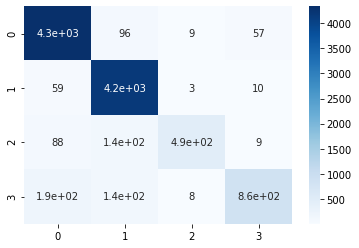

In [200]:
sns.heatmap(train_confusion,annot=True,cmap='Blues')

# 56
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [134]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [135]:
test_precision_mi=precision_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_precision_score micro:',test_precision_mi)
test_precision_ma=precision_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_precision_score macro:',test_precision_ma)
      

test_precision_score micro: 0.41004497751124436
test_precision_score macro: 0.24066370107922586


/Users/nakanoyukako/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
test_recall_mi=recall_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_recall_score micro:',test_recall_mi)
test_recall_ma=recall_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_recall_score macro:',test_recall_ma)

test_recall_score micro: 0.41004497751124436
test_recall_score macro: 0.2550977669398722


In [137]:
test_f1_mi=f1_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_f1_score micro:',test_f1_mi)
test_f1_ma=f1_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_f1_score macro:',test_f1_ma)

test_f1_score micro: 0.41004497751124436
test_f1_score macro: 0.22943351480390117


In [138]:
test_precision=precision_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_precision_score:',test_precision)
test_recall=recall_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_recall_score:',test_recall)
test_f1=f1_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_f1_score:',test_f1)



test_precision_score: [0.43117978 0.38861789 0.14285714 0.        ]
test_recall_score: [0.55315315 0.46138996 0.00584795 0.        ]
test_f1_score: [0.48460931 0.42188879 0.01123596 0.        ]


In [139]:
import numpy as  np
precision = test_precision
precision = np.append(precision, test_precision_mi)  # 末尾にマイクロ平均を追加
precision = np.append(precision, test_precision_ma)  # 末尾にマクロ平均を追加

 #再現率
recall = test_recall
recall = np.append(recall, test_recall_mi)
recall = np.append(recall, test_recall_ma)

  # F1スコア
f1 = test_f1
f1 = np.append(f1, test_f1_mi)
f1 = np.append(f1, test_f1_ma)


# 結果を結合してデータフレーム化
scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                        index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
print(scores)

             適合率       再現率     F1スコア
b       0.431180  0.553153  0.484609
e       0.388618  0.461390  0.421889
t       0.142857  0.005848  0.011236
m       0.000000  0.000000  0.000000
マイクロ平均  0.410045  0.410045  0.410045
マクロ平均   0.240664  0.255098  0.229434


# 57
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [201]:
lr.coef_

array([[ 0.12398211, -0.38620303,  0.18534838, ..., -0.52682236,
        -0.33524808,  0.60896619],
       [ 0.28423808,  0.22411316, -0.20623538, ...,  1.0687586 ,
         0.63735979, -0.34212853],
       [-0.31687207,  0.29122096, -0.07396743, ..., -0.26774524,
        -0.12459934,  0.03649389],
       [-0.09134812, -0.1291311 ,  0.09485443, ..., -0.27419099,
        -0.17751237, -0.30333156]])

In [231]:
index = [i for i in range(1, 11)]
features

array(['0m', '0million', '0nd', ..., 'zac efron', 'zendaya', 'zone'],
      dtype=object)

In [234]:
features = train_feature.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(lr.classes_, lr.coef_):
    print(f'【カテゴリ】{c}')
    best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T
    worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
    display(pd.concat([best10, worst10], axis=0))
    print('\n')


【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,fed,stocks,ecb,china,oil,euro,obamacare,ukraine,dollar
重要度下位,ebola,her,and,video,star,aereo,she,tv,microsoft,can




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,star,movie,film,her,she,jay,kim,beyonce
重要度下位,update,us,google,china,study,gm,apple,says,billion,facebook




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,cancer,study,drug,fda,mers,cases,health,cdc,heart
重要度下位,facebook,gm,google,apple,ceo,bank,climate,deal,twitter,sales




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,tesla,gm,heartbleed,nasa,samsung
重要度下位,stocks,fed,drug,percent,her,cancer,ukraine,heart,his,american


# 58
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [226]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
C_list=[10 ** i for i in range(-5, 4)]
result=[]
for C in C_list:
    clr=LogisticRegression(C=C,max_iter=10000)
    clr.fit(train_feature,x_train['CATEGORY'])
    train_predict_c=[clr.predict(train_feature),clr.predict_proba(train_feature)]
    valid_predict_c=[clr.predict(valid_feature),clr.predict_proba(valid_feature)]
    test_predict_c=[clr.predict(test_feature),clr.predict_proba(test_feature)]
    
    train_accuracy_c=accuracy_score(x_train['CATEGORY'], train_predict_c[0])
    valid_accuracy_c=accuracy_score(x_valid['CATEGORY'], valid_predict_c[0])
    test_accuracy_c=accuracy_score(x_test['CATEGORY'], test_predict_c[0])
    
    result.append([C,train_accuracy_c,valid_accuracy_c,test_accuracy_c])

In [227]:
result=np.array(result).T
result

array([[1.00000000e-05, 1.00000000e-04, 1.00000000e-03, 1.00000000e-02,
        1.00000000e-01, 1.00000000e+00, 1.00000000e+01, 1.00000000e+02,
        1.00000000e+03],
       [4.21570465e-01, 4.21570465e-01, 4.76386807e-01, 7.62087706e-01,
        8.03879310e-01, 9.23913043e-01, 9.77979760e-01, 9.96720390e-01,
        9.98407046e-01],
       [4.14542729e-01, 4.14542729e-01, 4.69265367e-01, 7.56371814e-01,
        7.88605697e-01, 8.83808096e-01, 9.05547226e-01, 8.86806597e-01,
        8.76311844e-01],
       [4.31034483e-01, 4.31034483e-01, 4.92503748e-01, 7.48875562e-01,
        7.82608696e-01, 8.79310345e-01, 8.83058471e-01, 8.63568216e-01,
        8.59070465e-01]])

<function matplotlib.pyplot.show(*args, **kw)>

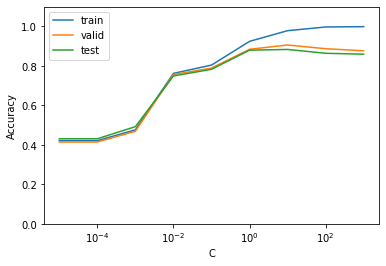

In [228]:
import matplotlib.pyplot as plt

plt.plot(result[0],result[1],label='train')
plt.plot(result[0],result[2],label='valid')
plt.plot(result[0],result[3],label='test')
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show

# 59
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [229]:
import optuna

In [230]:
def objective_lg(trial):
    l1_ratio =trial.suggest_uniform('l1_ratio',0,1)#name, low, high Suggest a value
    C=trial.suggest_loguniform('C',1e-4,1e4)#name, low, high  Suggest a value for the continuous parameter.
    
    params= {
        'random_state':123,
        'max_iter':10000,
        'penalty':'elasticnet',
        'solver': 'saga',
        'l1_ratio':l1_ratio,
        'C':C        
    }
    lr=LogisticRegression(**params)
    lr.fit(train_feature,x_train['CATEGORY'])
    
    valid_pred=[np.max(lr.predict_proba(valid_feature), axis=1), lr.predict(valid_feature)]
    valid_accuracy=accuracy_score(x_valid['CATEGORY'],valid_predict[0])
    return valid_accuracy

In [78]:
study=optuna.create_study(direction='maximize')
study.optimize(objective_lg,timeout=3600)

[I 2022-05-04 10:01:00,364] A new study created in memory with name: no-name-f55a3e65-90b0-4269-8c40-eb31ed2ae0c7
[I 2022-05-04 10:01:47,627] Trial 0 finished with value: 0.3778110944527736 and parameters: {'l1_ratio': 0.19297704518374426, 'C': 4.111353353649286}. Best is trial 0 with value: 0.3778110944527736.
[I 2022-05-04 10:01:55,125] Trial 1 finished with value: 0.3778110944527736 and parameters: {'l1_ratio': 0.25884007443549195, 'C': 0.004317828471550764}. Best is trial 0 with value: 0.3778110944527736.
[I 2022-05-04 10:02:05,133] Trial 2 finished with value: 0.3778110944527736 and parameters: {'l1_ratio': 0.5872282064362756, 'C': 0.0023061694037261635}. Best is trial 0 with value: 0.3778110944527736.
[I 2022-05-04 11:02:17,613] Trial 3 finished with value: 0.3778110944527736 and parameters: {'l1_ratio': 0.8112970419414341, 'C': 614.2894558562848}. Best is trial 0 with value: 0.3778110944527736.


In [80]:
print('Best trial:')
trial=study.best_trial
print(' Value:{:.3f}'.format(trial.value))
print(' Params:')
for key ,value in trial.params.items():
    print(' {}:{}.format(key,value)')

Best trial:
 Value:0.378
 Params:
 {}:{}.format(key,value)
 {}:{}.format(key,value)


In [81]:
lg=LogisticRegression(random_state=123,max_iter=10000,penalty=elasticnet,solver=saga,l1_ratio=l1_ratio,C=C)
lg.fit(train_feature,x_train['CATEGORY'])
    
train_pred_check=[np.max(lg.predict_proba(train_feature), axis=1), lg.predict(train_feature)]
train_accuracy_check=accuracy_score(x_train['CATEGORY'],train_pred_check[0])

valid_pred_check=[np.max(lg.predict_proba(valid_feature), axis=1), lg.predict(valid_feature)]
valid_accuracy=accuracy_score(x_valid['CATEGORY'],valid_pred_check[0])
 
test_pred_check=[np.max(lg.predict_proba(test_feature), axis=1), lg.predict(test_feature)]
test_accuracy=accuracy_score(x_test['CATEGORY'],test_pred_check[0])


NameError: name 'elasticnet' is not defined

In [ ]:
print(f'正解率（学習データ）：{train_accuracy_check:.3f}')
print(f'正解率（検証データ）：{valid_accuracy_check:.3f}')
print(f'正解率（評価データ）：{test_accuracy_check:.3f}')